In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import rcParams
import lmfit
import matplotlib.image as mpimg
from PIL import Image
from pathlib import Path
from collections import OrderedDict
from lmfit.models import LorentzianModel

In [2]:
# bokeh packages
from bokeh.io import output_file,show,output_notebook,push_notebook, curdoc
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,CategoricalColorMapper, Select, Slider
from bokeh.palettes import Category10
from bokeh.layouts import row,column,gridplot,widgetbox
from bokeh.models.widgets import Tabs,Panel
output_notebook()

Loading BokehJS ...

In [3]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams.update({'font.size': 20})
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams['xtick.top'] = True
rcParams['ytick.right'] = True
rcParams['xtick.major.size'] = 10
rcParams['ytick.major.size'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['ytick.minor.size'] = 5
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True

pd.set_option('display.max_rows', None)

In [110]:
#qz calculata using equation
def qxyz_h(ang, sample):
    y_pixels=np.arange(-822, 1190)  
    z_pixels=np.arange(-377, 1635) 
    
    #tan(phi)=height/perpendicular     height=pixel_size*y_pixels      perpendicular=distance of dector
    tan_phi=(0.146*y_pixels)/2269.44
    tan_theta_f=(0.146*z_pixels)/(np.sqrt(((0.146 * y_pixels[0])**2)+(2263.44**2)))
    
    #phi=tan-1(height/perpendicular)
    phi=np.arctan(tan_phi)
    thet_f=np.arctan(tan_theta_f)
    theta_f=thet_f-(ang*np.cos(phi))
    
    
    qx=((2*np.pi)/0.687)*((np.cos(theta_f)*np.cos(phi))-np.cos(ang))
    qy=((2*np.pi)/0.687)*(np.cos(theta_f)*np.sin(phi))
    qz=((2*np.pi)/0.687)*(np.sin(theta_f)+np.sin(ang))
    
    sam=np.genfromtxt(sample, delimiter='\t', usecols=[4],skip_header=40)
    sam=sam[::-1]
    q_z=np.column_stack((qz, sam)) #adding qz column
    q_zy=np.insert(q_z, 0, qy, axis=1)  #adding qy column
    q_xyz=np.insert(q_zy, 0, qx, axis=1)  #adding qx column
    q_xyz1=np.insert(q_xyz, 0, z_pixels, axis=1)  #adding qx column
    q_xyz2=np.insert(q_xyz1, 0, y_pixels, axis=1)  #adding qx column
    
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Qy(A^-1)')
  
    ax.plot(qy,sam,linewidth=3)
    #ax.set_xlim([-0.8, -0.18])
    #ax.set_ylim([0.007, 100])
    ax.set_yscale('log')
    plt.show()
    
    
    names=['y_pixels', "z_pixels",'qx', 'qy', 'qz',  'I' ]
    df=pd.DataFrame(q_xyz2, columns=names)

    return df


In [111]:

def qxyz_v(ang, sample):
    y_pixels=np.arange(-822, 523)  
    z_pixels=np.arange(-377, 968) 
    
    #tan(phi)=height/perpendicular     height=pixel_size*y_pixels      perpendicular=distance of dector
    tan_phi=(0.146*y_pixels)/2269.44
    tan_theta_f=(0.146*z_pixels)/(np.sqrt(((0.146 * y_pixels[0])**2)+(2263.44**2)))
    
    #phi=tan-1(height/perpendicular)
    phi=np.arctan(tan_phi)
    thet_f=np.arctan(tan_theta_f)
    theta_f=thet_f-(ang*np.cos(phi))
    
    
    qx=((2*np.pi)/0.687)*((np.cos(theta_f)*np.cos(phi))-np.cos(ang))
    qy=((2*np.pi)/0.687)*(np.cos(theta_f)*np.sin(phi))
    qz=((2*np.pi)/0.687)*(np.sin(theta_f)+np.sin(ang))
    
    sam=np.genfromtxt(sample, delimiter='\t', usecols=[4],skip_header=40)
    sam=sam[::-1]
    q_z=np.column_stack((qz, sam)) #adding qz column
    q_zy=np.insert(q_z, 0, qy, axis=1)  #adding qy column
    q_xyz=np.insert(q_zy, 0, qx, axis=1)  #adding qx column
    q_xyz1=np.insert(q_xyz, 0, z_pixels, axis=1)  #adding qx column
    q_xyz2=np.insert(q_xyz1, 0, y_pixels, axis=1)  #adding qx column
    
    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Qz(A^-1)')
  
    ax.plot(qz,sam,linewidth=3)
    #ax.set_xlim([-0.8, -0.18])
    #ax.set_ylim([0.007, 100])
    ax.set_yscale('log')
    plt.show()
    
    
    names=['y_pixels', "z_pixels",'qx', 'qy', 'qz',  'I' ]
    df=pd.DataFrame(q_xyz2, columns=names)

    return df



In [112]:
sample_h=Path.cwd()/'peak0.2'/'DP3_0.1_hort'/'SDP3_10_00451__GI_HLp_-0.02.dat'
sample_v=Path.cwd()/'peak0.2'/'DP3_0.1_vert'/'SDP3_10_00451__GI_VLp_-0.02.dat'

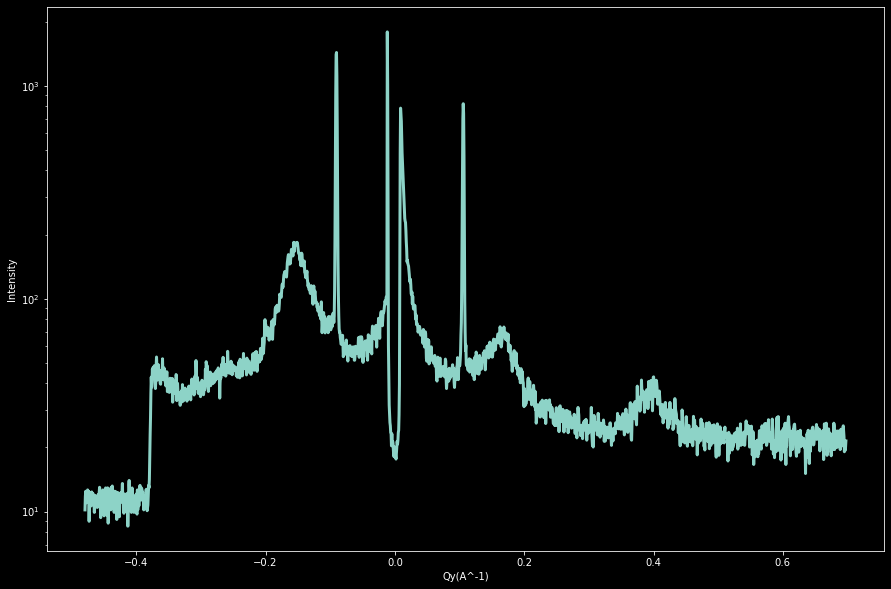

,y_pixels,z_pixels,qx,qy,qz,I
0,-822.0,-377.0,-0.037353,-0.479256,-0.219385,10.181818
1,-821.0,-376.0,-0.037250,-0.478679,-0.218804,11.818182
2,-820.0,-375.0,-0.037147,-0.478101,-0.218223,12.454545
3,-819.0,-374.0,-0.037044,-0.477523,-0.217641,11.363636
4,-818.0,-373.0,-0.036941,-0.476946,-0.217060,11.000000
5,-817.0,-372.0,-0.036838,-0.476368,-0.216479,11.363636
6,-816.0,-371.0,-0.036735,-0.475790,-0.215898,12.272727
7,-815.0,-370.0,-0.036633,-0.475213,-0.215317,12.636364
8,-814.0,-369.0,-0.036530,-0.474635,-0.214735,12.090909
9,-813.0,-368.0,-0.036427,-0.474057,-0.214154,12.454545


In [113]:
a=qxyz_h(0.1, sample_h)
a.head(10)

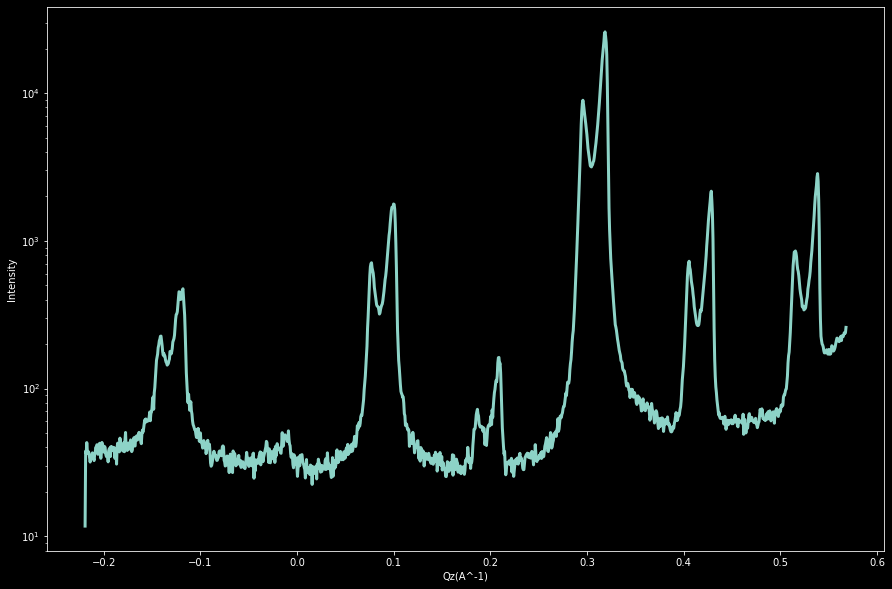

,y_pixels,z_pixels,qx,qy,qz,I
0,-822.0,-377.0,-0.037353,-0.479256,-0.219385,11.727273
1,-821.0,-376.0,-0.037250,-0.478679,-0.218804,37.636364
2,-820.0,-375.0,-0.037147,-0.478101,-0.218223,36.636364
3,-819.0,-374.0,-0.037044,-0.477523,-0.217641,43.090908
4,-818.0,-373.0,-0.036941,-0.476946,-0.217060,38.090908
5,-817.0,-372.0,-0.036838,-0.476368,-0.216479,36.363636
6,-816.0,-371.0,-0.036735,-0.475790,-0.215898,37.363636
7,-815.0,-370.0,-0.036633,-0.475213,-0.215317,36.454544
8,-814.0,-369.0,-0.036530,-0.474635,-0.214735,34.090908
9,-813.0,-368.0,-0.036427,-0.474057,-0.214154,31.818182


In [114]:
a=qxyz_v(0.1, sample_v)
a.head(10)

In [55]:
#qz calculata using equation
def qxyz(ang):
    y_pixels=np.arange(-822, 1225) 
    z_pixels=np.arange(-377, 1670) 
    
    
    #tan(phi)=height/perpendicular     height=pixel_size*y_pixels      perpendicular=distance of dector
    tan_phi=(0.146*y_pixels)/2269.44
    tan_theta_f=(0.146*z_pixels)/(np.sqrt(((0.146 * y_pixels[0])**2)+(2263.44**2)))
    
    #phi=tan-1(height/perpendicular)
    phi=np.arctan(tan_phi)
    thet_f=np.arctan(tan_theta_f)
    theta_f=thet_f-(ang*np.cos(phi))
   
    
    qx=((2*np.pi)/0.687)*((np.cos(theta_f)*np.cos(phi))-np.cos(ang))
    qy=((2*np.pi)/0.687)*(np.cos(theta_f)*np.sin(phi))
    qz=((2*np.pi)/0.687)*(np.sin(theta_f)+np.sin(ang))
    
    sam=np.zeros((2047,1))
    q_z=np.insert(sam, 0, qz, axis=1)  #adding qz column
    q_zy=np.insert(q_z, 0, qy, axis=1)  #adding qy column
    q_xyz=np.insert(q_zy, 0, qx, axis=1)  #adding qx column

    
    names=['qx', 'qy', 'qz','zero']
    df=pd.DataFrame(q_xyz, columns=names)
    df['ypixles']=y_pixels
    df['zpixles']=z_pixels

    return df

In [59]:
c=qxyz(0.1)
c.tail(50)

,qx,qy,qz,zero,ypixles,zpixles
1997,0.019590,0.689372,0.951997,0.0,1175,1620
1998,0.019543,0.689956,0.952584,0.0,1176,1621
1999,0.019497,0.690539,0.953171,0.0,1177,1622
2000,0.019450,0.691122,0.953759,0.0,1178,1623
2001,0.019403,0.691705,0.954346,0.0,1179,1624
2002,0.019356,0.692288,0.954933,0.0,1180,1625
2003,0.019309,0.692871,0.955520,0.0,1181,1626
2004,0.019262,0.693454,0.956107,0.0,1182,1627
2005,0.019215,0.694038,0.956694,0.0,1183,1628
2006,0.019168,0.694621,0.957281,0.0,1184,1629


In [58]:
df=pd.read_excel('peak0.2.xlsx')
df.head(50)

,qx,qy,qz,qx2+qy2,qx2+qy2+qz2
0,-0.0011,-0.24,-0.02,0.057601,0.058001
1,-0.0012,-0.21,-0.04,0.044101,0.045701
2,-0.0030,-0.19,-0.06,0.036109,0.039709
3,-0.0050,-0.17,-0.08,0.028925,0.035325
4,-0.0080,-0.15,-0.10,0.022564,0.032564
5,-0.0110,-0.13,-0.12,0.017021,0.031421
6,-0.0120,-0.11,-0.14,0.012244,0.031844
7,-0.0140,-0.09,-0.16,0.008296,0.033896
8,-0.0150,-0.07,-0.18,0.005125,0.037525
9,-0.0170,-0.05,-0.20,0.002789,0.042789


In [121]:
def igor_plot(angle, data):
    y_pixels=np.arange(-822, 1190)  
    z_pixels=np.arange(-377, 1635) 
    
    #tan(phi)=height/perpendicular     height=pixel_size*y_pixels      perpendicular=distance of dector
    tan_phi=(0.146*y_pixels)/2269.44
    tan_theta_f=(0.146*z_pixels)/(np.sqrt(((0.146 * y_pixels[0])**2)+(2263.44**2)))
    
    #phi=tan-1(height/perpendicular)
    phi=np.arctan(tan_phi)
    thet_f=np.arctan(tan_theta_f)
    
    ang=angle*(np.pi/180)
    theta_f=thet_f-(ang*np.cos(phi))
    
    
    qx=((2*np.pi)/0.687)*((np.cos(theta_f)*np.cos(phi))-np.cos(ang))
    qy=((2*np.pi)/0.687)*(np.cos(theta_f)*np.sin(phi))
    qz=((2*np.pi)/0.687)*(np.sin(theta_f)+np.sin(ang))  
    
    samples=[]
    for sample in data:
        sam=np.genfromtxt(sample, delimiter='\t', usecols=[4],skip_header=39)
        sam=sam[::-1]
        q_z=np.column_stack((qz, sam)) #adding qz column
        q_zy=np.insert(q_z, 0, qy, axis=1)  #adding qy column
        q_xyz=np.insert(q_zy, 0, qx, axis=1)  #adding qx column
        q_xyz1=np.insert(q_xyz, 0, z_pixels, axis=1)  #adding qx column
        q_xyz2=np.insert(q_xyz1, 0, y_pixels, axis=1)  #adding qx column  
        samples.append(q_xyz2)
    samples=np.array(samples)
    
    qz = samples[:,:,4]
    qy=samples[:,:,3]
    
    I=samples[:,:,5]   
    
    
    color=['red','white','green','blue','gray','yellow','purple','pink', 'red', 'white']

    plt.style.use('dark_background')
    fig, ax= plt.subplots(figsize=(15,10))
    ax.set(ylabel='Intensity', xlabel='Qz(A^-1)')
    for i in range(len(data)):
        ax.plot(qy[i,:],I[i,:], color=color[i],linewidth=3,label=data[i][1:4])
    ax.legend()
    #ax.set_xlim([-0.8, -0.18])
    #ax.set_ylim([0.007, 100])
    ax.set_yscale('log')
    plt.title('GSAXS for ' + str(figname) +' at angle =' +str(angle)+ ' without Si subtraction')
    #return plt.savefig(figname)
    plt.show()

In [122]:
samp_h=Path.cwd()/'peak0.2'/'DP3_0.1_hort'
samples=samp_h.glob('SDP3_10_00451__GI_HLp_*.dat')

igor_plot(0.1, samples)

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2012 and the array at index 1 has size 2014